In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [7]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [9]:
# Basic Dataset Overview
print("Customers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to

In [11]:
# Checking for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(merged_data.describe())

# EDA Visualizations
sns.set_style("whitegrid")


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023

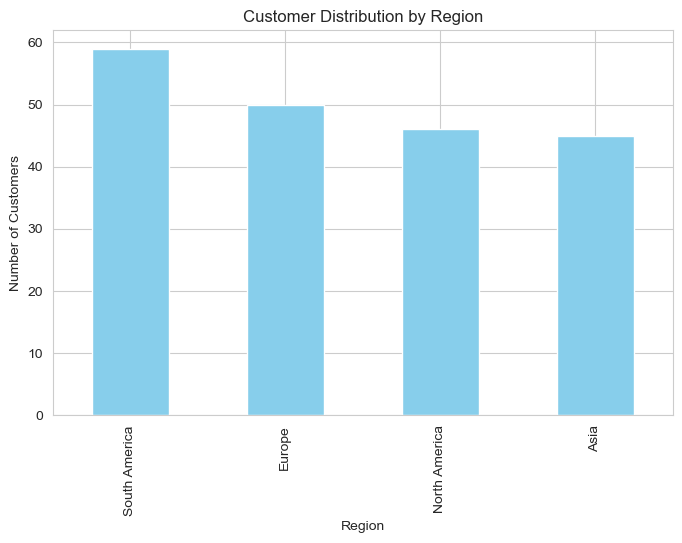

In [15]:
# 1. Customer distribution by region
plt.figure(figsize=(8, 5))
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.show()


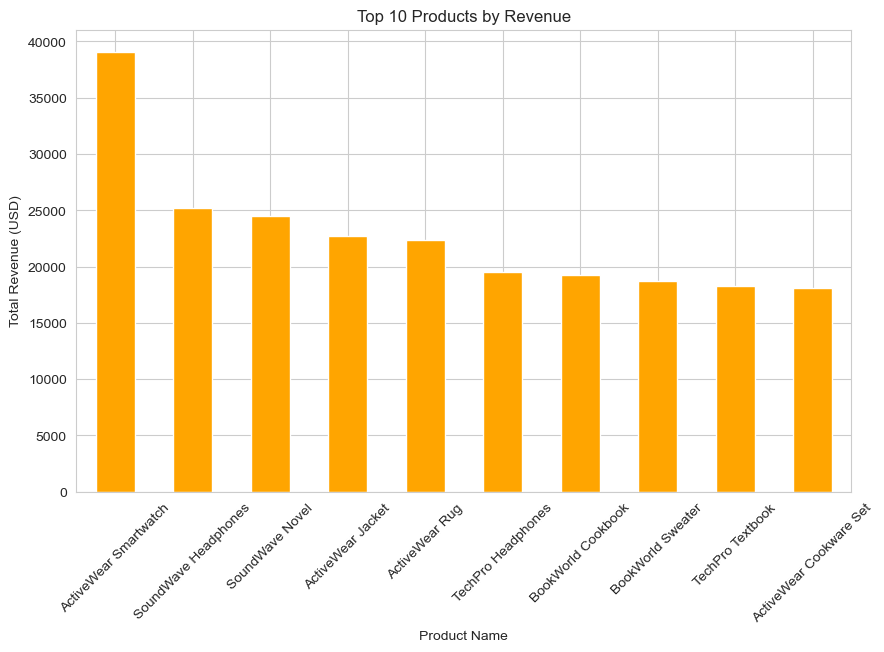

In [17]:
# 2. Top 10 products by revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

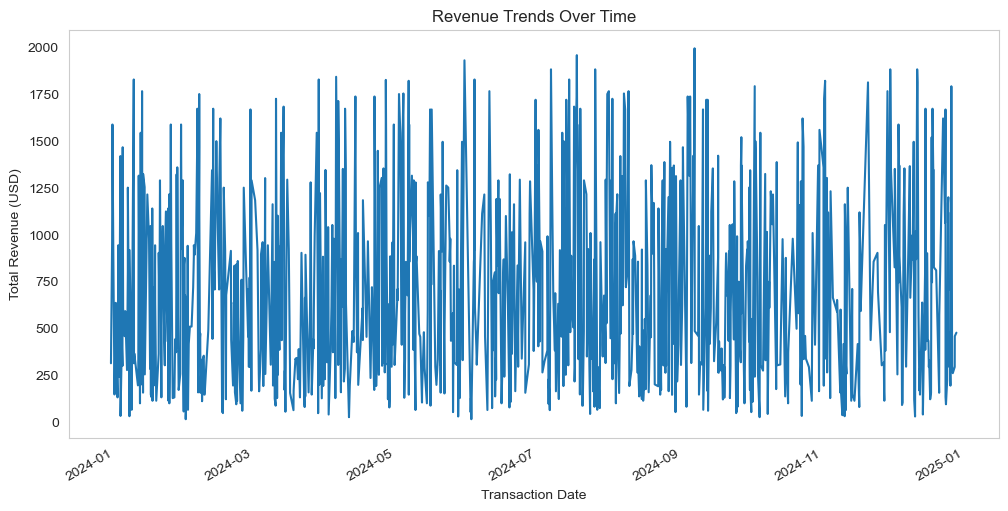

In [19]:
# 3. Revenue trends over time
plt.figure(figsize=(12, 6))
merged_data.groupby('TransactionDate')['TotalValue'].sum().plot()
plt.title('Revenue Trends Over Time')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Transaction Date')
plt.grid()
plt.show()

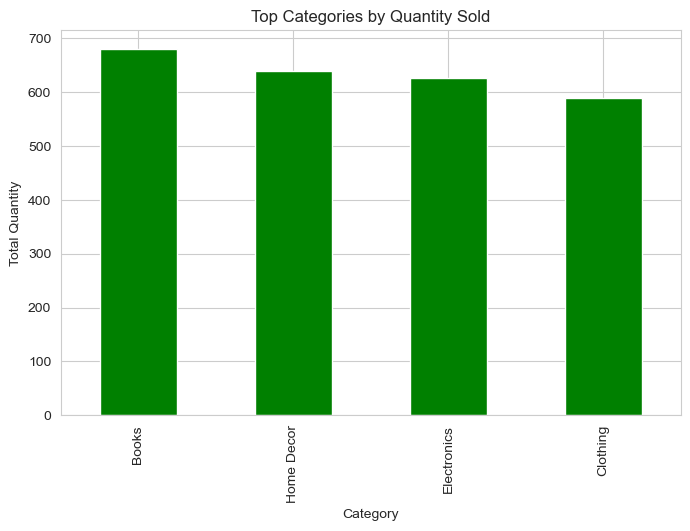

In [21]:
# 4. Top categories by quantity sold
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='green')
plt.title('Top Categories by Quantity Sold')
plt.ylabel('Total Quantity')
plt.xlabel('Category')
plt.show()

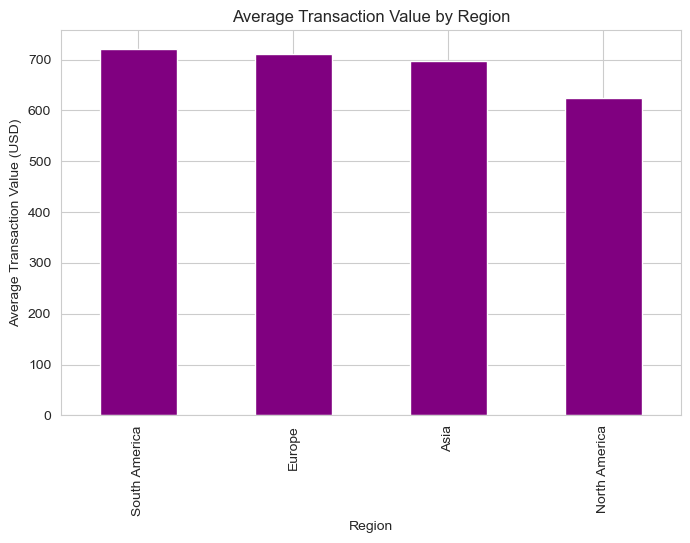

In [23]:
# 5. Average transaction value by region
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_transaction_value.plot(kind='bar', color='purple')
plt.title('Average Transaction Value by Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xlabel('Region')
plt.show()

In [25]:
# Save cleaned merged data for future use
merged_data.to_csv('Cleaned_Merged_Data.csv', index=False)
print("Cleaned merged data saved as 'Cleaned_Merged_Data.csv'")


Cleaned merged data saved as 'Cleaned_Merged_Data.csv'
